In [1]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph , START , END
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm=ChatGroq(model="llama3-8b-8192")

In [5]:
# Node
def chatbot(state:State):
    return{"messages":[llm.invoke(state["messages"])]}

In [6]:
graph_builder = StateGraph(State)

# Adding node
graph_builder.add_node("llmchatbot",chatbot)
# Adding Edge
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

# Compile the graph
graph=graph_builder.compile()

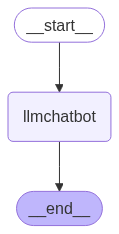

In [7]:
graph

In [8]:
response = graph.invoke({"messages": ["Hi"]})

In [9]:
response["messages"][-1].content

"Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?"

In [10]:
for event in graph.stream({"messages":"Hi How are your?"}):
    for value in event.values():
        print(value["messages"][-1].content)

I'm just a language model, I don't have feelings or emotions like humans do. However, I'm functioning properly and ready to help you with any questions or tasks you have! How can I assist you today?


In [11]:
from langchain_tavily import TavilySearch
tool = TavilySearch(max_results=3)
tool.invoke("What is Tesla?")

c:\Users\user\Desktop\LangGraph2\a7_lang\.venv\Lib\site-packages\langchain_tavily\tavily_crawl.py:76: SyntaxWarning: invalid escape sequence '\.'
  description="""Regex patterns to select only URLs from specific domains or subdomains.
c:\Users\user\Desktop\LangGraph2\a7_lang\.venv\Lib\site-packages\langchain_tavily\tavily_crawl.py:95: SyntaxWarning: invalid escape sequence '\.'
  description="""Regex patterns to exclude URLs from specific domains or subdomains.
c:\Users\user\Desktop\LangGraph2\a7_lang\.venv\Lib\site-packages\langchain_tavily\tavily_crawl.py:229: SyntaxWarning: invalid escape sequence '\.'
  """Regex patterns to select only URLs from specific domains or subdomains.
c:\Users\user\Desktop\LangGraph2\a7_lang\.venv\Lib\site-packages\langchain_tavily\tavily_crawl.py:239: SyntaxWarning: invalid escape sequence '\.'
  """
c:\Users\user\Desktop\LangGraph2\a7_lang\.venv\Lib\site-packages\langchain_tavily\tavily_map.py:76: SyntaxWarning: invalid escape sequence '\.'
  description

{'query': 'What is Tesla?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Electric Cars, Solar & Clean Energy | Tesla',
   'url': 'https://www.tesla.com/about',
   'content': 'About | Tesla We’re building a world powered by solar energy, running on batteries and transported by electric vehicles. Our energy generation and storage products work together with our electric vehicles to amplify their impact. Our energy generation and storage products work together with our electric vehicles to amplify their impact. Image 2: Home powered by Tesla energy products Image 4: Tesla electric vehicle Make badass, zero-emission vehicles that can charge with clean energy Image 5: Home powered by Tesla energy products Image 7: Tesla electric vehicle After safety, our goal is to make every Tesla the most fun you could possibly have in a vehicle. After safety, our goal is to make every Tesla the most fun you could possibly have in a vehicle.',
   'score': 0.3821419

In [13]:
response=graph.invoke({"messages":"What is 5 add 2"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 add 2
================================== Ai Message ==================================

5 + 2 = 7


In [15]:
response=graph.invoke({"messages":"Give me the recent ai news and then add 5 to 10"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Give me the recent ai news and then add 5 to 10
================================== Ai Message ==================================

Here are the recent AI news and I'll add 5-10 more:

**Recent AI News:**

1. **Google's AI-powered LaMDA chatbot**: Google has announced a new AI chatbot called LaMDA (Large Memory Augmented Diachronic Architecture) that can have conversations with humans in a more natural and conversational way.
2. **Facebook's AI can generate realistic synthetic faces**: Facebook AI researchers have developed an AI system that can generate highly realistic synthetic faces, which could be used for various applications like entertainment, education, and even security.
3. **Amazon's Alexa gets new AI-powered features**: Amazon has announced several new AI-powered features for its Alexa virtual assistant, including the ability to recognize and respond to multiple voices and languages.
4. **Micros

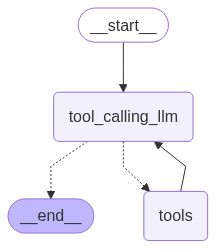

In [27]:
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")

## compile the graph
graph=builder.compile(checkpointer=memory)

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [29]:
config = {"configurable":{"thread_id":"1"}} 
response = graph.invoke({"messages":"Hi my name is Rohit"} , config = config) 
response 

KeyError: 'messages'

In [30]:
from typing import Annotated 
from typing_extensions import TypedDict 
from langgraph.graph import StateGraph , START , END 
from langgraph.graph.message import add_messages 

In [31]:
class State(TypedDict):
    messages:Annotated[list, add_messages] 

In [32]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [33]:
from langchain_groq import ChatGroq 
from langchain.chat_models import init_chat_model 
llm = ChatGroq(model = "llama3-8b-8192") 

In [34]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000017ED2AF0910>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000017ED2AF0690>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [35]:
llm=init_chat_model("groq:llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000017ED2AF1BD0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000017ED2AF25D0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [36]:
### Node 
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]} 

In [37]:
graph_builder=StateGraph(State)

## Adding node
graph_builder.add_node("llmchatbot",chatbot)
## Adding Edges
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

## compile the graph
graph=graph_builder.compile()

In [38]:
graph_builder = StateGraph(State) 
##Add Node 
graph_builder.add_node("llmchatbot" , chatbot) 
##Add Edges 
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot" , END) 
##compile the graph 
graph = graph_builder.compile() 

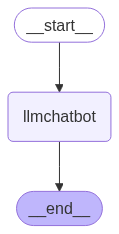

In [39]:
graph

In [40]:
response=graph.invoke({"messages":"Hi"})

In [41]:
response

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='afa280af-53fb-4333-8a46-76622dc2430e'),
  AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.017530601, 'prompt_time': 0.001663784, 'queue_time': 0.270562217, 'total_time': 0.019194385}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_2717d04279', 'finish_reason': 'stop', 'logprobs': None}, id='run--e2781e95-f717-4e1c-b054-76c71ca10697-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})]}

In [42]:
response["messages"][-1].content

"Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?"

In [43]:
for event in graph.stream({"messages":"Hi How are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

I'm just a language model, I don't have feelings or emotions like humans do, but I'm functioning properly and ready to help you with any questions or tasks you may have! It's great to chat with you. How can I assist you today?


In [44]:
from langchain_tavily import TavilySearch
tool=TavilySearch(max_results=2)
tool.invoke("What is langgraph")

{'query': 'What is langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'What is LangGraph? - IBM',
   'url': 'https://www.ibm.com/think/topics/langgraph',
   'content': 'LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-making by modeling c

In [45]:

from langchain_tavily import TavilySearch 
tool = TavilySearch(max_results = 3) 
tool.invoke("What is Tesla?") 

{'query': 'What is Tesla?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Electric Cars, Solar & Clean Energy | Tesla',
   'url': 'https://www.tesla.com/about',
   'content': 'About | Tesla We’re building a world powered by solar energy, running on batteries and transported by electric vehicles. Our energy generation and storage products work together with our electric vehicles to amplify their impact. Our energy generation and storage products work together with our electric vehicles to amplify their impact. Image 2: Home powered by Tesla energy products Image 4: Tesla electric vehicle Make badass, zero-emission vehicles that can charge with clean energy Image 5: Home powered by Tesla energy products Image 7: Tesla electric vehicle After safety, our goal is to make every Tesla the most fun you could possibly have in a vehicle. After safety, our goal is to make every Tesla the most fun you could possibly have in a vehicle.',
   'score': 0.3821419

In [46]:

##Custom functions 
def addition(a:int, b:int):
    """Add a and b
    Args:
    a(int): first int 
    b(int): second int 

    Returns:
    int: output int 
    """
    return a + b 

In [47]:
tools=[tool,addition]

In [48]:
llm_with_tool=llm.bind_tools(tools)

In [49]:
llm_with_tool=llm.bind_tools(tools)

In [51]:
llm_with_tool

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000017ED2AF1BD0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000017ED2AF25D0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': [], 'description': 'A list 

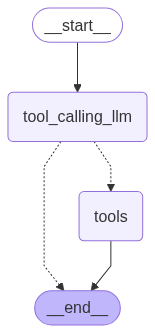

In [52]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools",END)

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [53]:
response = graph.invoke({"messages":"What is the recent or latesr news in Jaipur?"})

In [54]:

response['messages'][-1].content

'{"query": "latest news in Jaipur", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://curlytales.com/amul-mother-dairy-britannia-among-india-top-food-brands-for-full-list-inside/", "title": "Amul, Mother Dairy & Britannia Among India’s Top Food Brands For 2025; Full List Inside - Curly Tales", "score": 0.49992734, "published_date": "Mon, 30 Jun 2025 11:23:24 GMT", "content": "#discover\\n\\n4 days ago\\n\\n### Boasting Of A 360° Bar, This 8,000 Sq. Ft New Restaurant In Jaipur Is A Love Letter To The City\\n\\n 766 \\n\\n#travel\\n\\n6 days ago\\n\\n### 7 People Felt Dizzy & Nauseated On London-Mumbai Air India Flight; Probe Launched To Know More\\n\\n 753 \\n\\n#ct scoop\\n\\n7 days ago\\n\\n### Hosur Flyover Shut After Crack Appears, Chennai–Bengaluru Highway Sees Long Traffic\\n\\n 720 \\n\\nLatest Originals\\n----------------\\n\\nImage 92: Andhra-Style Banana Leaf Brunch With Vishnu Manchu X Kamiya Jani\\n\\n#hero", "raw_content": null}, {"url"

In [55]:
for i in response['messages']:
    i.pretty_print() 

================================ Human Message =================================

What is the recent or latesr news in Jaipur?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (zf0qy268v)
 Call ID: zf0qy268v
  Args:
    query: latest news in Jaipur
    search_depth: advanced
    time_range: day
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "latest news in Jaipur", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://curlytales.com/amul-mother-dairy-britannia-among-india-top-food-brands-for-full-list-inside/", "title": "Amul, Mother Dairy & Britannia Among India’s Top Food Brands For 2025; Full List Inside - Curly Tales", "score": 0.49992734, "published_date": "Mon, 30 Jun 2025 11:23:24 GMT", "content": "#discover\n\n4 days ago\n\n### Boasting Of A 360° Bar, This 8,000 Sq. Ft New Restaurant In Jaipur Is A Love Le

In [56]:
response = graph.invoke({"messages":"What is 5 add 2"})
for i in response['messages']:
    i.pretty_print()

================================ Human Message =================================

What is 5 add 2
================================== Ai Message ==================================
Tool Calls:
  addition (4pkgs5rx9)
 Call ID: 4pkgs5rx9
  Args:
    a: 5
    b: 2
================================= Tool Message =================================
Name: addition

7


In [57]:
response=graph.invoke({"messages":"Give me the recent ai news and then add 5 to 10"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Give me the recent ai news and then add 5 to 10
================================== Ai Message ==================================
Tool Calls:
  tavily_search (efx3hqa22)
 Call ID: efx3hqa22
  Args:
    query: recent ai news
    search_depth: advanced
    topic: news
  addition (wke804fad)
 Call ID: wke804fad
  Args:
    a: 5
    b: 10
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.newsweek.com/nw-ai/ai-impact-awards-2025-science-engineering-2084754", "title": "AI Impact Awards 2025: The Changing Human Role in Science and Engineering - Newsweek", "score": 0.7318455, "published_date": "Wed, 25 Jun 2025 10:02:01 GMT", "content": "Newsweek _\\_will continue the conversation on meaningful AI innovations at our AI Impact Summit from June 23

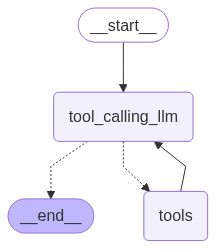

In [66]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [67]:
response = graph.invoke({"messages":"Hello my name is Rohit"})
for i in response['messages']:
    i.pretty_print() 

================================ Human Message =================================

Hello my name is Rohit
================================== Ai Message ==================================
Tool Calls:
  tavily_search (dw1dr75pc)
 Call ID: dw1dr75pc
  Args:
    query: Rohit
    search_depth: basic
    topic: general
================================= Tool Message =================================
Name: tavily_search

{"query": "Rohit", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Rohit T. Aggarwala - NYC.gov", "url": "https://www.nyc.gov/site/dep/about/leadership.page", "content": "Rohit T. Aggarwala Commissioner Rohit T. \"Rit\" Aggarwala was appointed Commissioner of the New York City Department of Environmental Protection and the City's Chief Climate Officer in February 2022. Under his leadership, DEP has been at the forefront of both stormwater and coastal resilience, streamlined its procurement processes to be able to invest more money in infrastruc

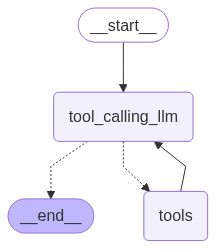

In [68]:
# Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")

## compile the graph
graph=builder.compile(checkpointer=memory)

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [69]:
config = {"configurable":{"thread_id":"1"}} 
response = graph.invoke({"messages":"Hi my name is Rohit"} , config = config) 
response 

{'messages': [HumanMessage(content='Hi my name is Rohit', additional_kwargs={}, response_metadata={}, id='3d15ecda-f2f4-4a25-a38e-b625251a1f94'),
  AIMessage(content='Hi Rohit! Nice to meet you. How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 2193, 'total_tokens': 2210, 'completion_time': 0.014697719, 'prompt_time': 0.241372493, 'queue_time': 0.27273907500000005, 'total_time': 0.256070212}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--0163705c-a395-440b-9625-57b5c59d2344-0', usage_metadata={'input_tokens': 2193, 'output_tokens': 17, 'total_tokens': 2210})]}

In [70]:

response['messages'][-1].content

'Hi Rohit! Nice to meet you. How can I help you today?'

In [71]:

response=graph.invoke({"messages":"Hey what is my name"},config=config)

print(response['messages'][-1].content)

Your name is Rohit.


In [72]:

response=graph.invoke({"messages":"Hey do you remember my name"},config=config)

print(response['messages'][-1].content)

Yes, your name is Rohit.


In [73]:
from langgraph.checkpoint.memory import MemorySaver 
memory = MemorySaver() 

In [74]:
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

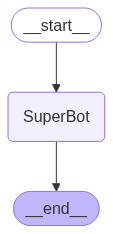

In [75]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [76]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Rohit And I like cricket"},config)

{'messages': [HumanMessage(content='Hi,My name is Rohit And I like cricket', additional_kwargs={}, response_metadata={}, id='2b7f30f0-7763-4e90-8ed2-4dc9a684b317'),
  AIMessage(content="Hi Rohit! Nice to meet you! Cricket is a fantastic sport, isn't it? Who's your favorite team or player?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 21, 'total_tokens': 49, 'completion_time': 0.019837752, 'prompt_time': 0.002875694, 'queue_time': 0.27111461600000003, 'total_time': 0.022713446}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_2717d04279', 'finish_reason': 'stop', 'logprobs': None}, id='run--61365874-8473-44c0-ab68-94b99eccf2b0-0', usage_metadata={'input_tokens': 21, 'output_tokens': 28, 'total_tokens': 49})]}

In [77]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Rohit And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Hi Rohit! Nice to meet you! Cricket is a fantastic sport, isn't it? Which team do you support? Are you a fan of Indian cricket or do you follow other teams like Australia, England, or Pakistan?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 21, 'total_tokens': 68, 'completion_time': 0.039272898, 'prompt_time': 0.005052256, 'queue_time': 0.388061302, 'total_time': 0.044325154}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--e5479c6b-d58a-4b72-a396-4492e975921f-0', usage_metadata={'input_tokens': 21, 'output_tokens': 47, 'total_tokens': 68})]}}
